In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import networkx as nx
import pandas as pd
from itertools import combinations
import math

In [24]:
edges = pd.read_csv("20_10_edges.csv").drop(columns = ["Unnamed: 0"])
cleaned_data = pd.read_csv("cleaned_data.csv").drop(columns = ["Unnamed: 0"])

In [25]:
G = nx.Graph()

In [26]:
for index, row in edges.iterrows():
    G.add_edge(row['first_node'], row['second_node'], weight=row['weight'])

In [27]:
filtered_data = cleaned_data[cleaned_data['id'].isin(list(G.nodes()))]
filtered_data.head()

,Latitude,Longitude,genus,species,id
0,37.881406,-122.269948,Ginkgo,biloba,0
1,37.881301,-122.269876,Ginkgo,biloba,1
3,37.881012,-122.269623,Ginkgo,biloba,3
4,37.880920,-122.269599,Ginkgo,biloba,4
5,37.880842,-122.269560,Ginkgo,biloba,5


In [28]:
deg_list = []
for node in sorted(list(G.nodes())):
    #print ("Degree of ", node, " are : ", G.degree(node))
    deg_list.append(G.degree(node))


In [29]:
filtered_data['degree'] = deg_list

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
total_degree_by_genus = filtered_data.groupby('genus')['degree'].sum().sort_values(ascending=False)

In [31]:
avg_degree_by_genus = filtered_data.groupby('genus')['degree'].mean().sort_values(ascending=False)

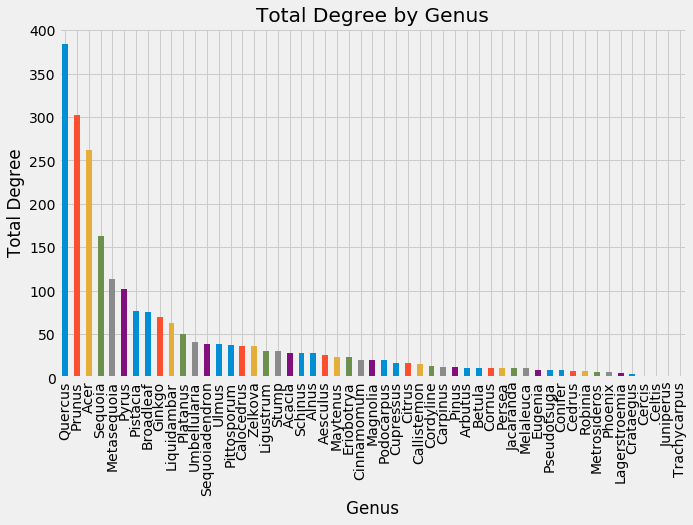

In [32]:
plt.figure(figsize=(10, 6))
total_degree_by_genus.plot(kind='bar')
plt.title("Total Degree by Genus")
plt.ylabel("Total Degree")
plt.xlabel("Genus")
plt.show()

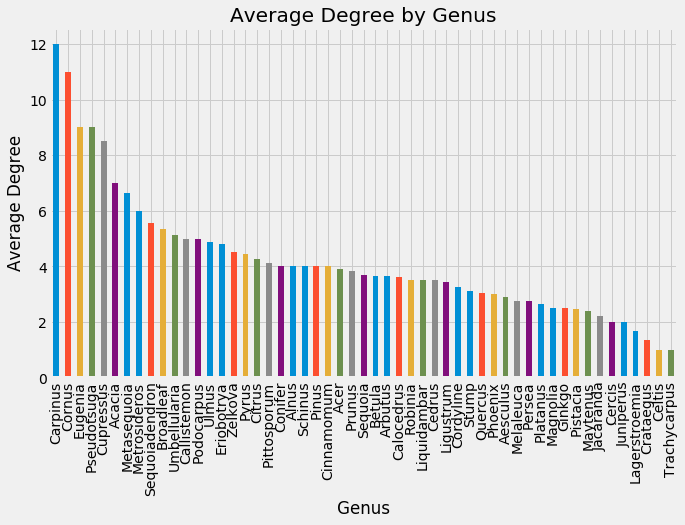

In [33]:
plt.figure(figsize=(10, 6))
avg_degree_by_genus.plot(kind='bar')
plt.title("Average Degree by Genus")
plt.ylabel("Average Degree")
plt.xlabel("Genus")
plt.show()

In [34]:
lat_lon_dict = {}
for index, row in filtered_data.iterrows():
    node=row[4]
    lat=row[0]
    lon=row[1]
    lat_lon_dict[node] = (lon,lat)

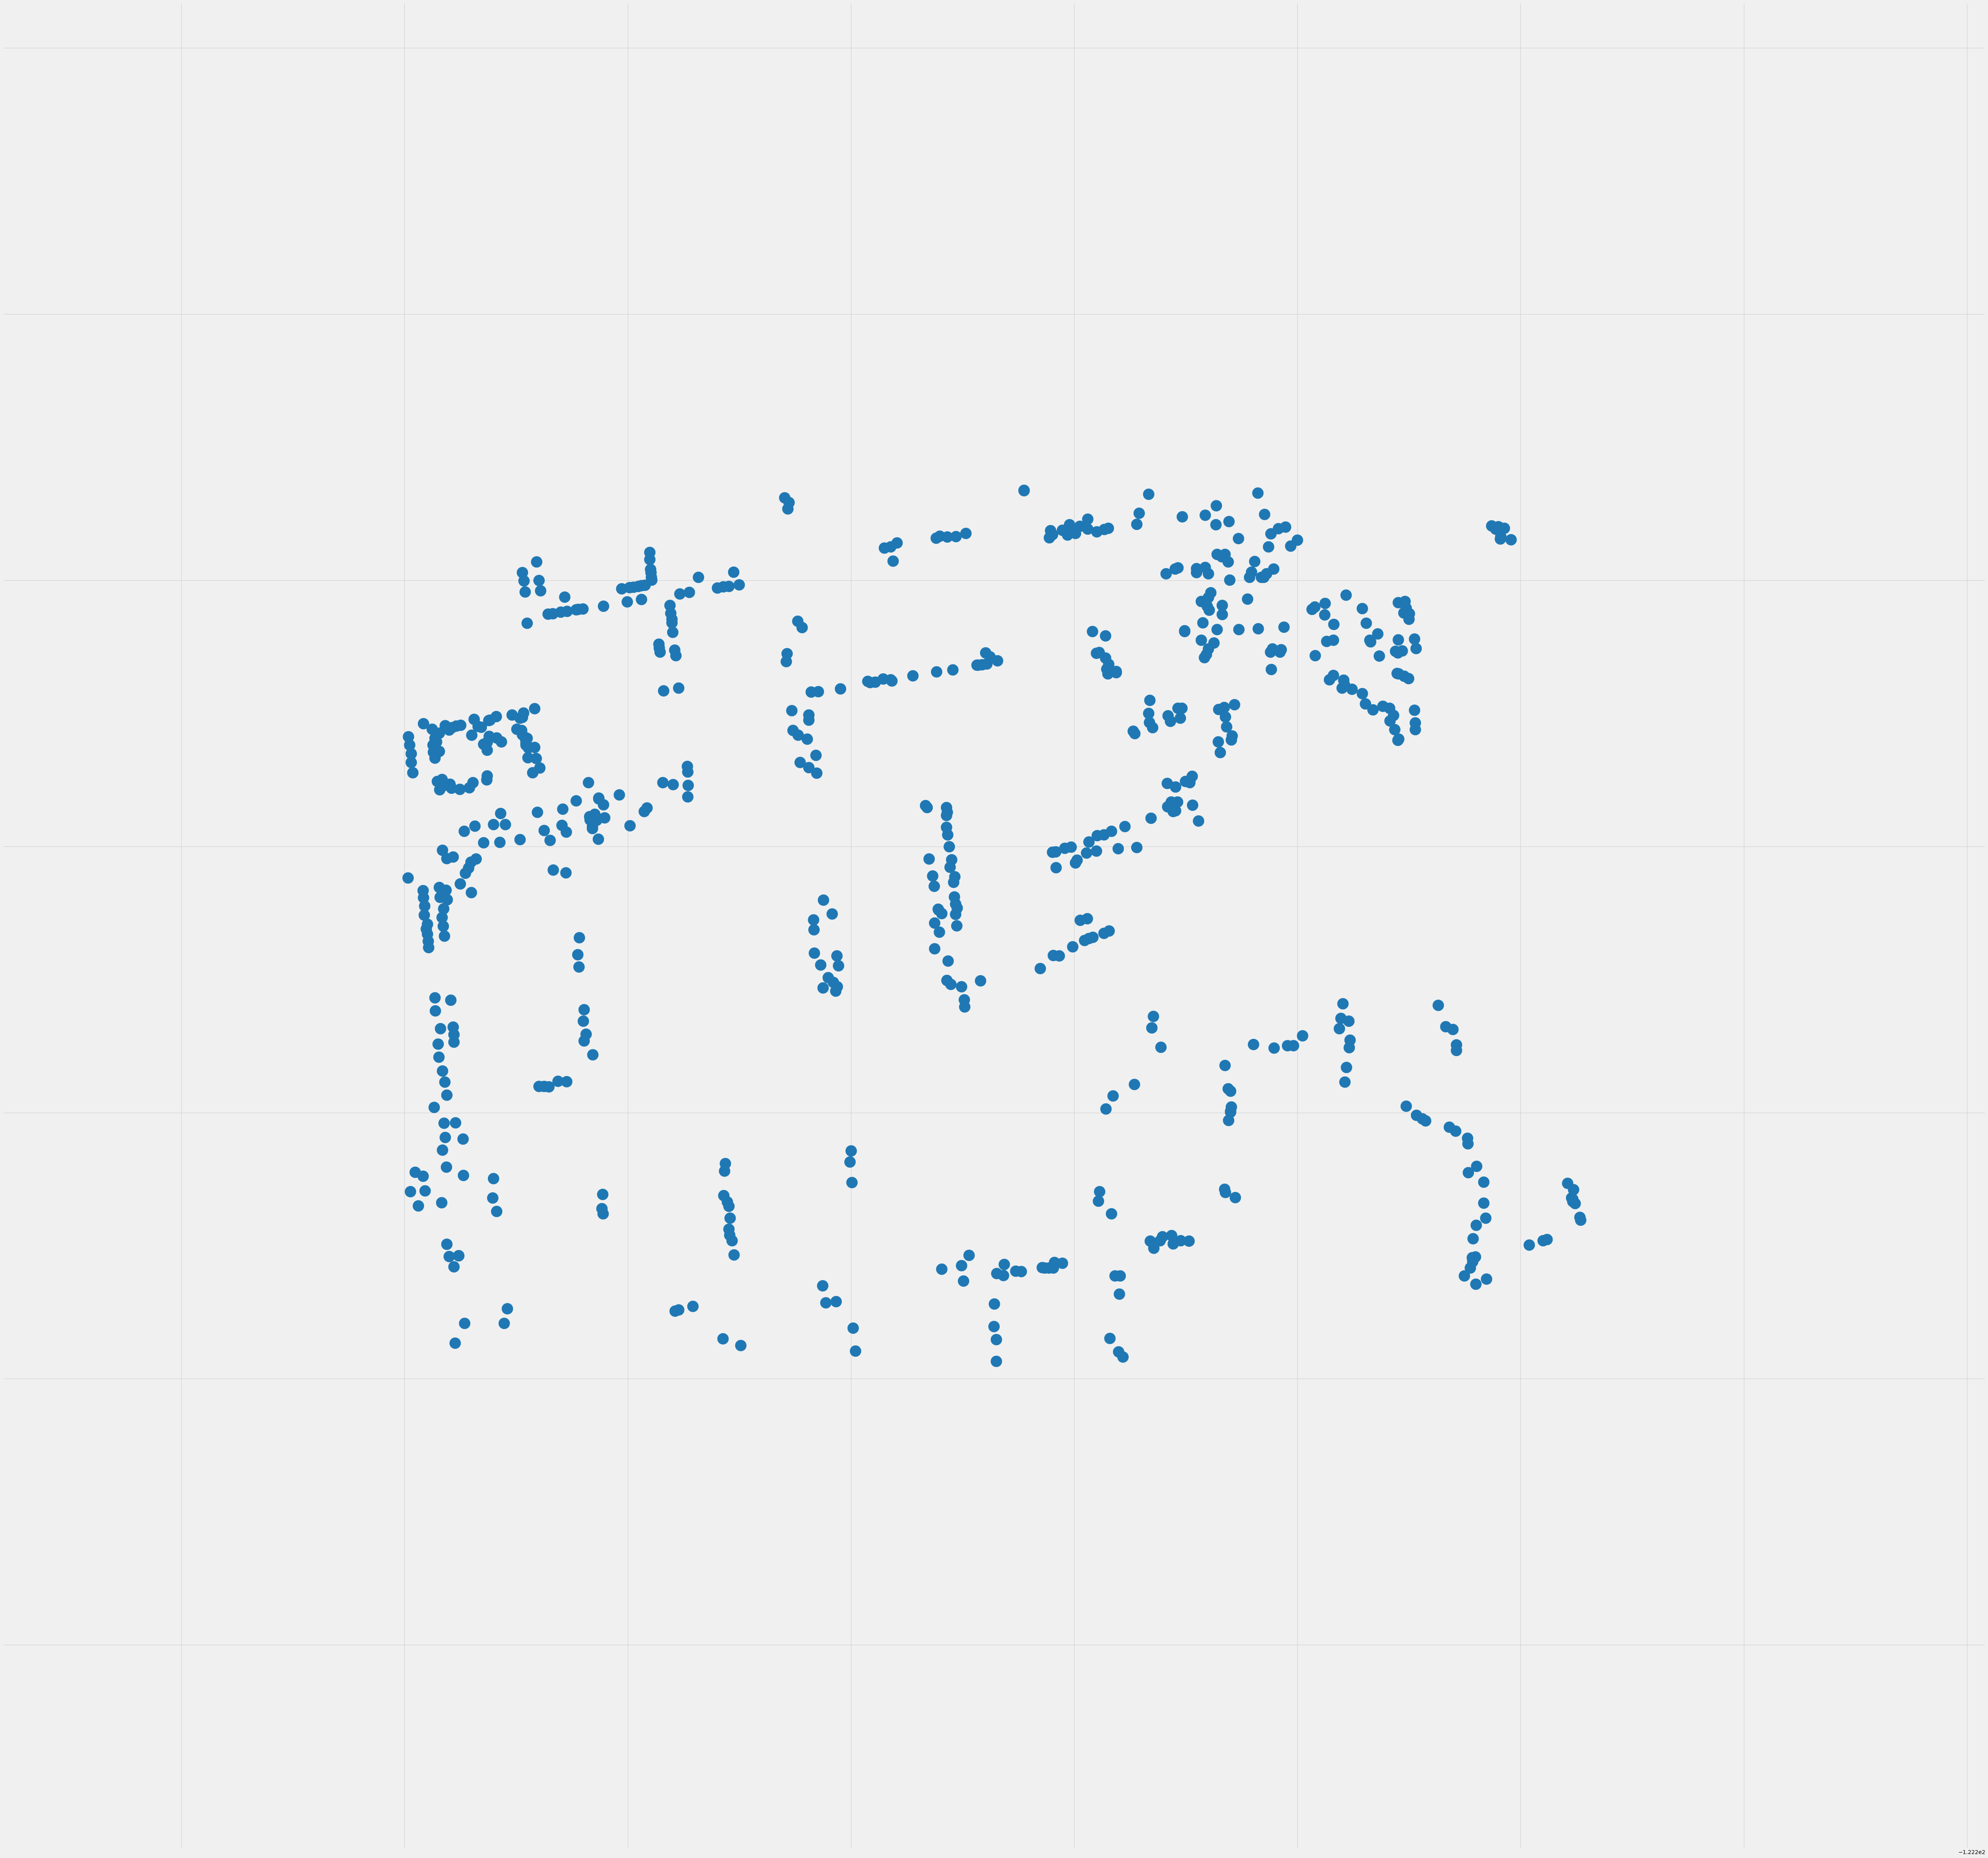

In [35]:
plt.figure(figsize=(80,80))
nx.draw_networkx_nodes(G,lat_lon_dict, node_size=800)          
plt.show()

In [36]:
close_centrality = list(nx.closeness_centrality(G).values())

(array([ 52.,  10.,  36.,  82.,  79., 127., 118.,  82.,  38.,  29.]),
 array([-6.48004456, -6.17991423, -5.8797839 , -5.57965357, -5.27952323,
        -4.9793929 , -4.67926257, -4.37913224, -4.07900191, -3.77887158,
        -3.47874124]),
 <a list of 10 Patch objects>)

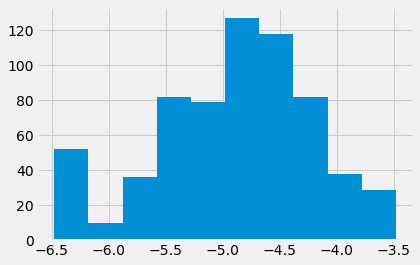

In [41]:
transformed_close_centrality = np.log(close_centrality)
plt.hist(transformed_close_centrality)

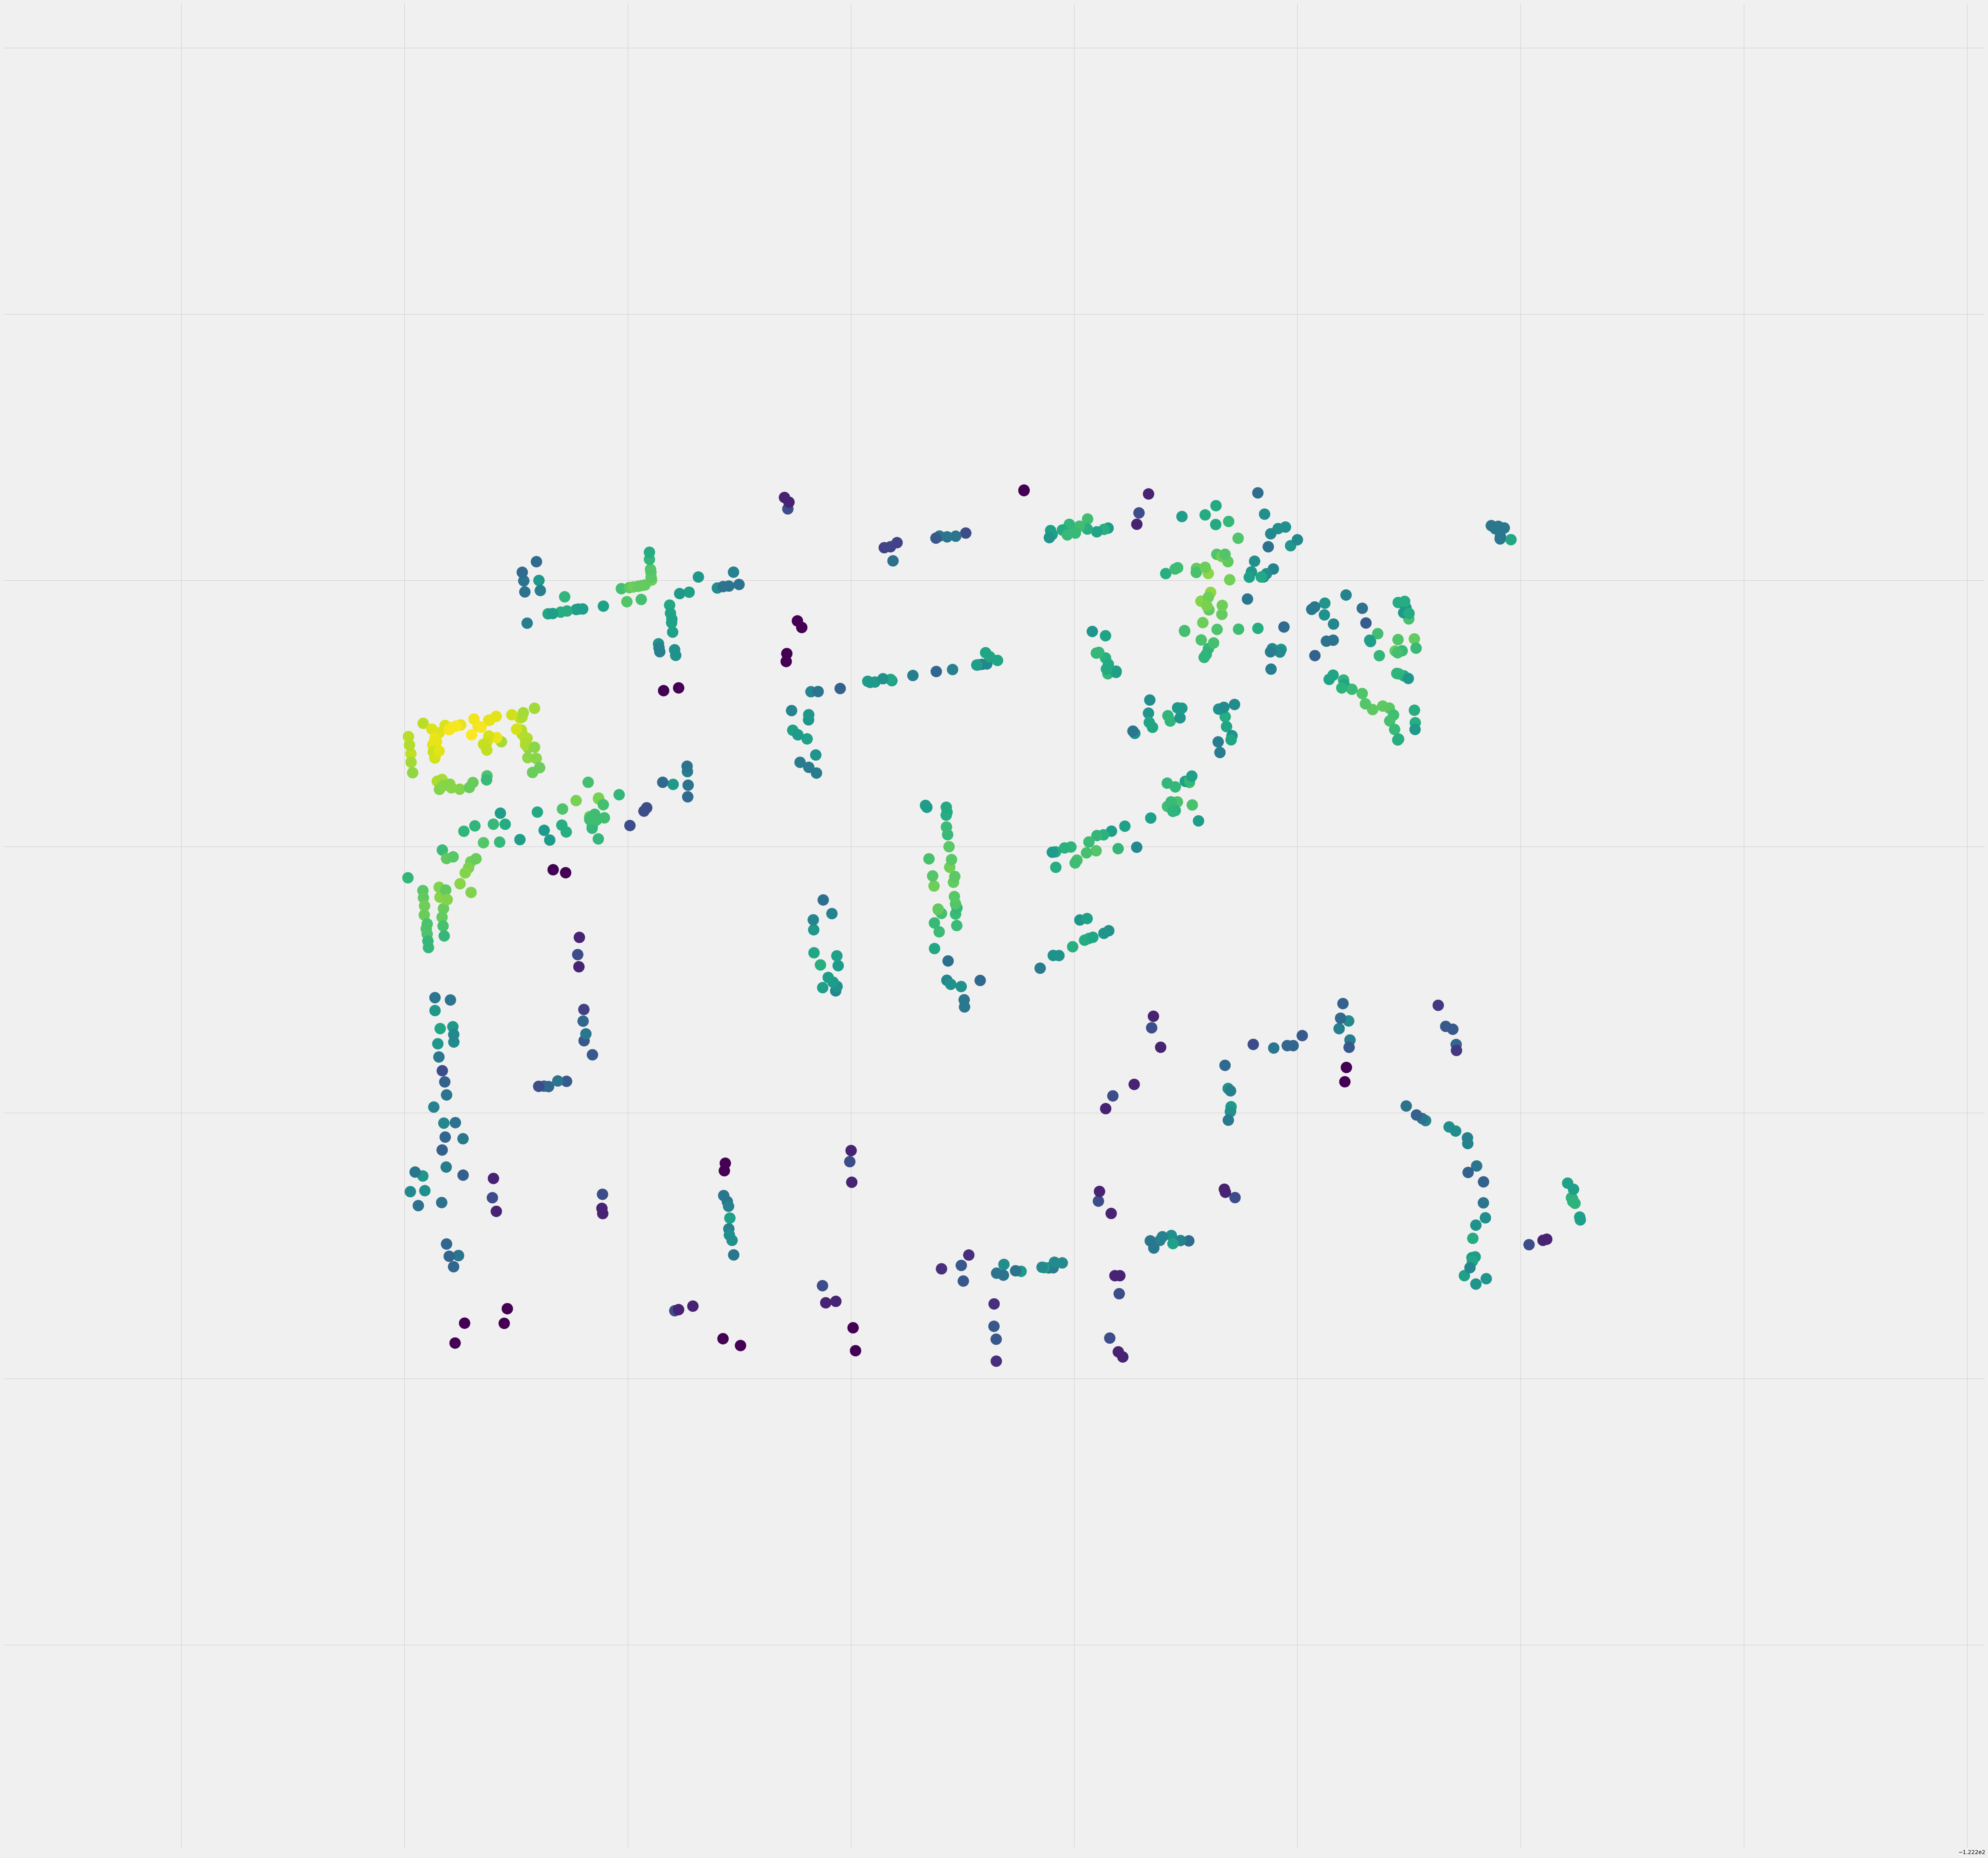

In [42]:
plt.figure(figsize=(80,80))
nx.draw_networkx_nodes(G,lat_lon_dict, node_size=800,node_color=transformed_close_centrality)          
plt.show()